<a href="https://colab.research.google.com/github/vinodraj93/US-Accidents/blob/master/Data_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import all required libraries
import pandas as pd
import io
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving US_Accidents_Dec19.csv to US_Accidents_Dec19.csv


In [0]:
acci = pd.read_csv(io.BytesIO(uploaded['US_Accidents_Dec19.csv']))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
acci = pd.read_csv("/content/drive/My Drive/DSCI 521/US_Accidents_Dec19.csv")
acci.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


### Data Preprocessing

In [0]:
print('NA values count')
variables = pd.DataFrame((len(acci) - acci.count())*100/len(acci)>10)
print(variables)

#remove NA values
removing_var = variables[variables[0] == True].index.values
removing_var = [i for i in removing_var]
newdata = acci.drop(columns={i for i in removing_var})

NA values count
                           0
ID                     False
Source                 False
TMC                     True
Severity               False
Start_Time             False
End_Time               False
Start_Lat              False
Start_Lng              False
End_Lat                 True
End_Lng                 True
Distance(mi)           False
Description            False
Number                  True
Street                 False
Side                   False
City                   False
County                 False
State                  False
Zipcode                False
Country                False
Timezone               False
Airport_Code           False
Weather_Timestamp      False
Temperature(F)         False
Wind_Chill(F)           True
Humidity(%)            False
Pressure(in)           False
Visibility(mi)         False
Wind_Direction         False
Wind_Speed(mph)         True
Precipitation(in)       True
Weather_Condition      False
Amenity                Fals

In [0]:
acci_group= newdata.groupby('State')
# Print the max distance affected in each State
acci_group['Distance(mi)'].max()

State
AL     35.180000
AR     43.450001
AZ    109.440002
CA    227.210007
CO    254.399994
CT     93.613000
DC      3.030000
DE     10.030000
FL     90.370003
GA    132.499000
IA    224.589996
ID     80.047000
IL     57.814000
IN     85.260002
KS     49.492000
KY     34.620000
LA    151.525000
MA     79.946000
MD     32.040001
ME     19.740000
MI     65.599000
MN    158.880005
MO     19.260000
MS     27.510000
MT     86.488000
NC     31.770000
ND     16.038000
NE     73.549000
NH     22.510000
NJ     34.590000
NM     96.550003
NV    193.479996
NY     74.000000
OH    150.138000
OK     35.950001
OR    138.562000
PA    165.259995
RI     11.140000
SC    333.630005
SD     86.488000
TN     49.770000
TX    130.490005
UT    105.489998
VA     71.655000
VT     23.430000
WA     98.860001
WI     42.540001
WV     42.536000
WY    106.279999
Name: Distance(mi), dtype: float64

In [0]:
# To see one group - State
acci_group.get_group('NY')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194255,A-194257,MapQuest,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,0.010,Right lane blocked due to accident on I-87 Sou...,Route 17,R,Sloatsburg,Rockland,NY,10974,US,US/Eastern,KCDW,2016-11-30 16:53:00,53.1,93.0,29.81,1.0,East,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
194256,A-194258,MapQuest,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,2.530,Accident on I-87 Southbound between Exit 14B C...,I-287 S,R,Suffern,Rockland,NY,10901,US,US/Eastern,KCDW,2016-11-30 15:53:00,53.1,93.0,29.83,1.0,ENE,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
194257,A-194259,MapQuest,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,1.170,Accident on I-287 Cross Westchester Expy Eastb...,Hutchinson River Pkwy S,R,White Plains,Westchester,NY,10605,US,US/Eastern,KHPN,2016-11-30 15:56:00,52.0,93.0,29.81,2.0,East,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
194258,A-194260,MapQuest,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,0.010,Right hand shoulder blocked due to accident on...,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,89.0,29.86,3.0,East,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
194259,A-194261,MapQuest,3,2016-11-30 16:17:57,2016-11-30 17:02:44,41.390369,-73.597969,0.010,Right hand shoulder blocked due to accident on...,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,89.0,29.86,3.0,East,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973950,A-2973974,Bing,2,2019-08-23 16:48:32,2019-08-23 17:16:06,40.731626,-73.872164,0.000,At Woodhaven Blvd - Accident. Lane blocked.,Long Island Expy W,R,Elmhurst,Queens,NY,11373,US,US/Eastern,KLGA,2019-08-23 16:51:00,75.0,51.0,29.97,10.0,N,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2973954,A-2973978,Bing,2,2019-08-23 16:16:21,2019-08-23 16:44:16,40.969130,-73.816990,0.000,At Leewood Dr - Accident. Right lane blocked.,Leewood Dr,R,Tuckahoe,Westchester,NY,10707,US,US/Eastern,KHPN,2019-08-23 15:56:00,75.0,50.0,29.53,10.0,NNW,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2973955,A-2973979,Bing,2,2019-08-23 16:40:16,2019-08-23 17:06:13,40.689860,-73.567770,0.075,At Meadowbrook Rd/Exit 23 - Accident. Left lan...,Southern State Pkwy W,R,Merrick,Nassau,NY,11566,US,US/Eastern,KFRG,2019-08-23 16:53:00,73.0,64.0,29.83,10.0,N,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2973962,A-2973986,Bing,2,2019-08-23 19:20:28,2019-08-23 19:49:25,40.601750,-74.060440,1.627,Between I-278/Verrazano-Narrows Brg and Belt P...,I-278 E,R,Staten Island,Richmond,NY,10305,US,US/Eastern,KEWR,2019-08-23 18:51:00,75.0,57.0,29.97,10.0,VAR,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [0]:
newdata['Distance(mi)'][newdata['Severity']==4].max() # Max distance affected with highest severity

152.543

In [0]:
#remove NA values
newdata.dropna(axis=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

<Figure size 720x432 with 0 Axes>

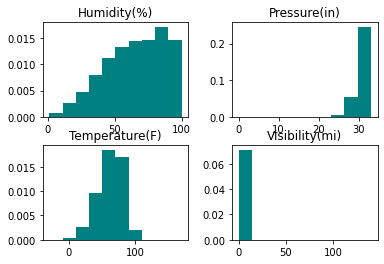

In [0]:
fig = plt.figure(figsize=(10,6))

newdata[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']].hist(density=True, grid=0, color='teal')
plt.savefig('Histogram.png')
plt.show()

In [0]:
traffic = pd.DataFrame(newdata[['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']].sum()).reset_index()

In [0]:
traffic.columns = ['Road Condition', 'Number']
traffic

,Road Condition,Number
0,Amenity,34243
1,Bump,443
2,Crossing,203346
3,Give_Way,7177
4,Junction,229944
5,No_Exit,3331
6,Railway,24169
7,Roundabout,163
8,Station,54187
9,Stop,38945


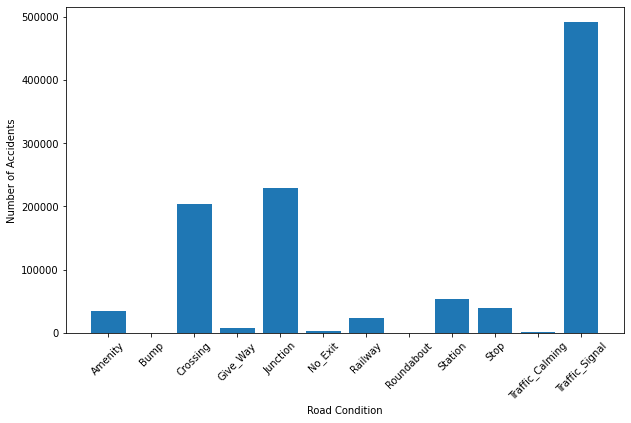

In [0]:
fig = plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.bar(traffic['Road Condition'],height=traffic['Number'])
plt.savefig('Accidents by Road.png')
plt.show()

In [0]:
s1 = newdata.loc[ newdata['Severity'] == 1, ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']].sum().reset_index()

s2 = newdata.loc[ newdata['Severity'] == 2, ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']].sum().reset_index()
s3 = newdata.loc[ newdata['Severity'] == 3, ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']].sum().reset_index()
s4 = newdata.loc[ newdata['Severity'] == 4, ['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']].sum().reset_index()

In [0]:
s1.columns = ['Road Condition', 'Number']
s2.columns = ['Road Condition', 'Number']
s3.columns = ['Road Condition', 'Number']
s4.columns = ['Road Condition', 'Number']

s1

,Road Condition,Number
0,Amenity,17
1,Bump,0
2,Crossing,86
3,Give_Way,1
4,Junction,13
5,No_Exit,3
6,Railway,7
7,Roundabout,0
8,Station,25
9,Stop,27


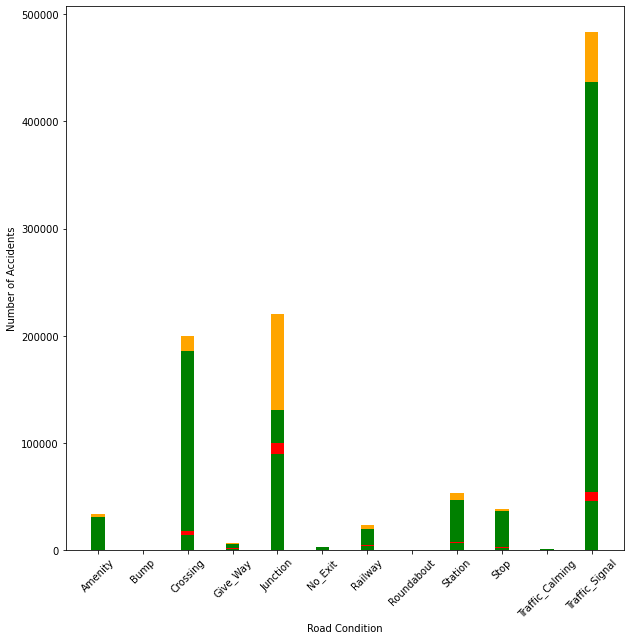

In [0]:
#newdata['Distance(mi)'][newdata['Severity']==4].max() # Max distance affected with highest severity
fig = plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 600000, 10000))
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
p1=plt.bar(x=s1['Road Condition'],height=s1['Number'], width=0.3, bottom=None, color='blue')
p2=plt.bar(x=s2['Road Condition'],height=s2['Number'], width=0.3, bottom=s1['Number'], color='green')
p3=plt.bar(x=s3['Road Condition'],height=s3['Number'], width=0.3, bottom=s2['Number'], color='orange')
p4=plt.bar(x=s4['Road Condition'],height=s4['Number'], width=0.3, bottom=s3['Number'], color='red')
#plt.legend(plt.legend(plt.legend((p1[0], p2[0], p3[0], p4[0]) ,('1','2','3','4'))))
plt.savefig('Accidents by Road234.png')
plt.show()

In [0]:
traffic

,Road Condition,Number
0,Amenity,34243
1,Bump,443
2,Crossing,203346
3,Give_Way,7177
4,Junction,229944
5,No_Exit,3331
6,Railway,24169
7,Roundabout,163
8,Station,54187
9,Stop,38945


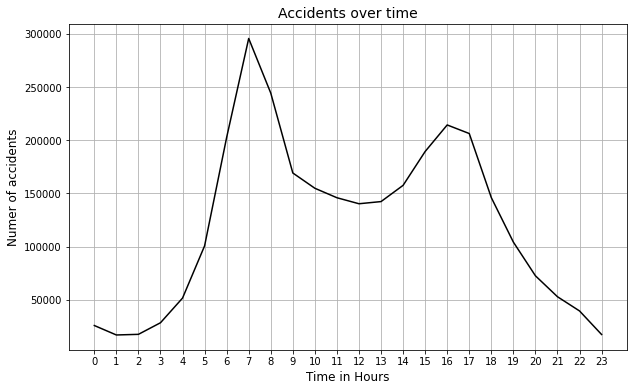

<Figure size 432x288 with 0 Axes>

In [0]:
#TIME:
acci['timestamp'] = pd.to_datetime(acci['Weather_Timestamp'])
acci['Hour'] = acci['timestamp'] .dt.hour
acci['Minute'] = acci['timestamp'] .dt.minute
hours = [hour for hour, df in acci.groupby('Hour')]
plt.figure(figsize=(10,6))
plt.plot(hours, acci.groupby(['Hour'])['ID'].count(), color='black')
plt.title('Accidents over time', fontsize = 14 )
plt.xticks(hours)
plt.xlabel('Time in Hours', fontsize = 12)
plt.ylabel('Numer of accidents', fontsize = 12)
plt.grid()
plt.show()
plt.savefig('time.png')

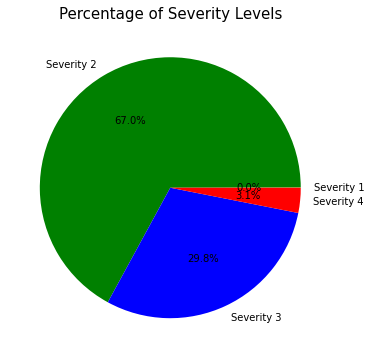

In [0]:
#Severity count visualization:
x = acci.groupby('Severity').size()
values = ['Severity 1','Severity 2','Severity 3','Severity 4']
cols = ['yellow', 'green', 'blue', 'red']
plt.figure(figsize=(10,6))
plt.pie(x,
        colors = cols,
        labels= values,
        explode = (0,0,0,0), #moving slices apart
        autopct = ('%1.1f%%')) #to display %
plt.title('Percentage of Severity Levels', fontsize=15);

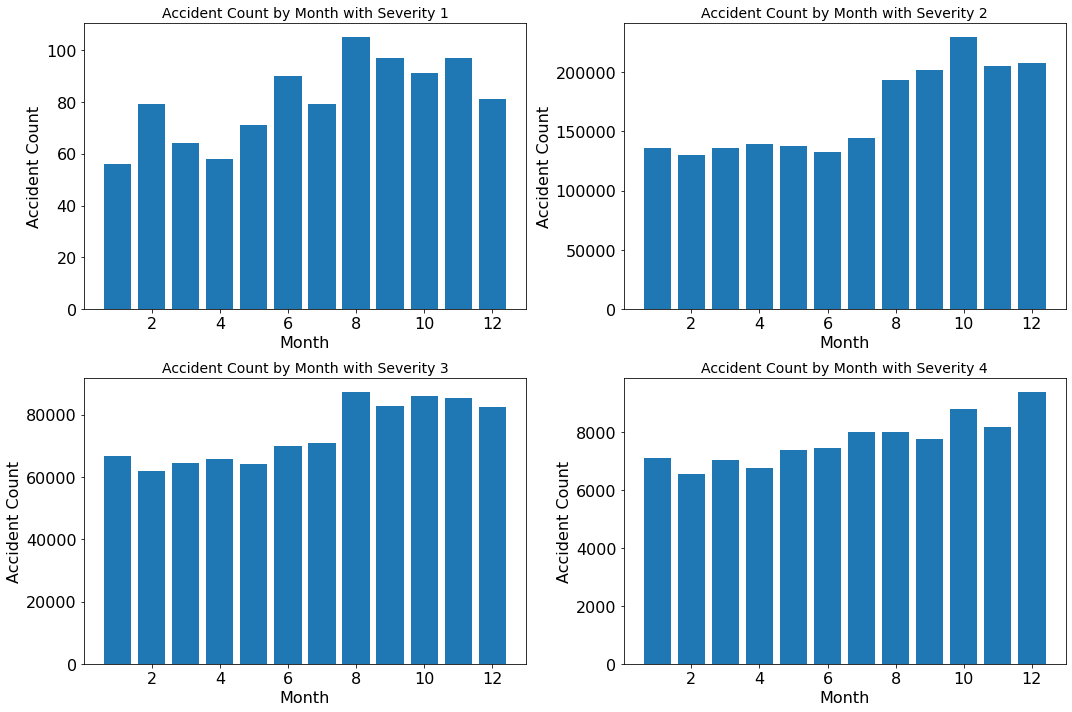

In [0]:
import numpy as np
#Accident count by Month with diff Severity:

acci['time'] = pd.to_datetime(acci.Start_Time, format='%Y-%m-%d %H:%M:%S')
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(acci.loc[acci["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

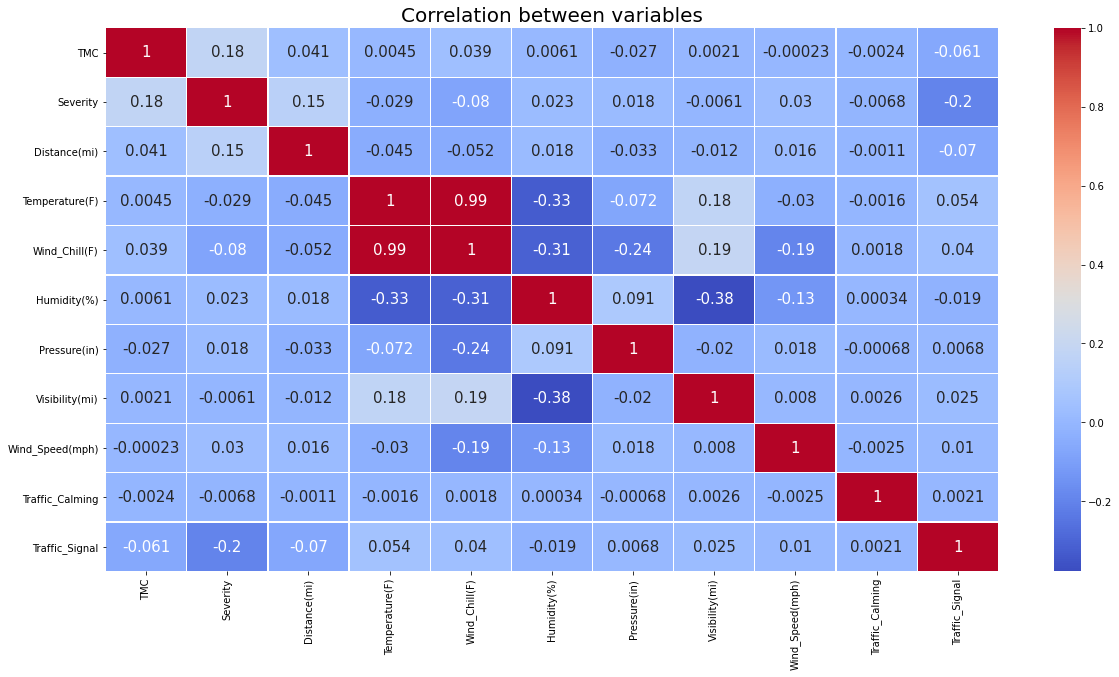

In [0]:
import seaborn as sns
#Correlation between Severity and other variables:
fig=sns.heatmap(acci[['TMC','Severity','Distance(mi)',
                    'Temperature(F)','Wind_Chill(F)','Humidity(%)','Weather_Condition',
                    'Pressure(in)','Visibility(mi)','Wind_Speed(mph)', 'Traffic_Calming', 'Traffic_Signal' ]].corr(),
                annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Correlation between variables', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


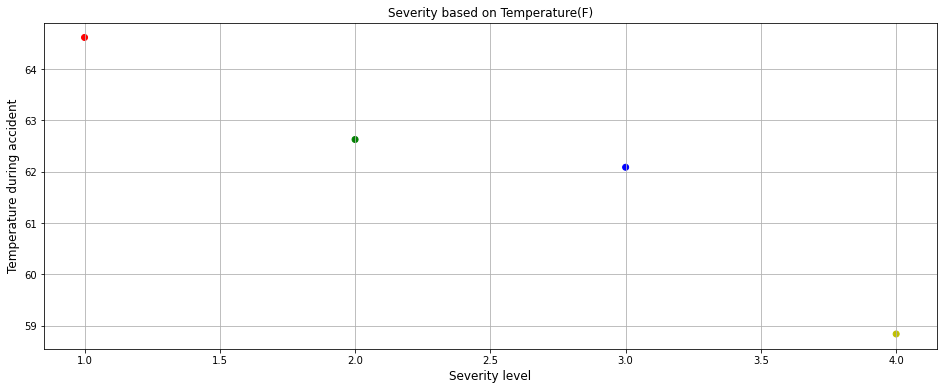

In [0]:
x = acci.groupby('Severity')['Temperature(F)'].mean().reset_index()
plt.figure(figsize=(16, 6))
plt.scatter(x['Severity'], x['Temperature(F)'], color='rgby')
plt.title('Severity based on Temperature(F)',fontsize=12)
plt.xlabel('Severity level',fontsize=12)
plt.ylabel('Temperature during accident',fontsize=12)
plt.grid()
plt.show()

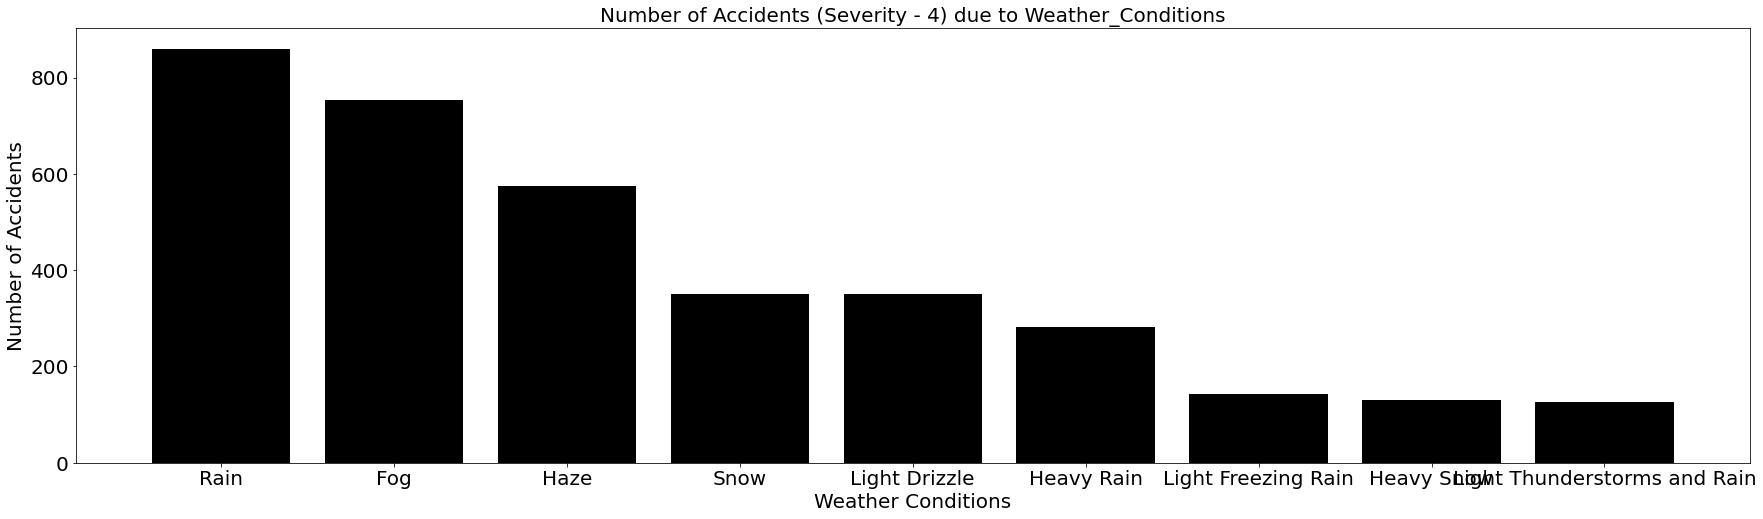

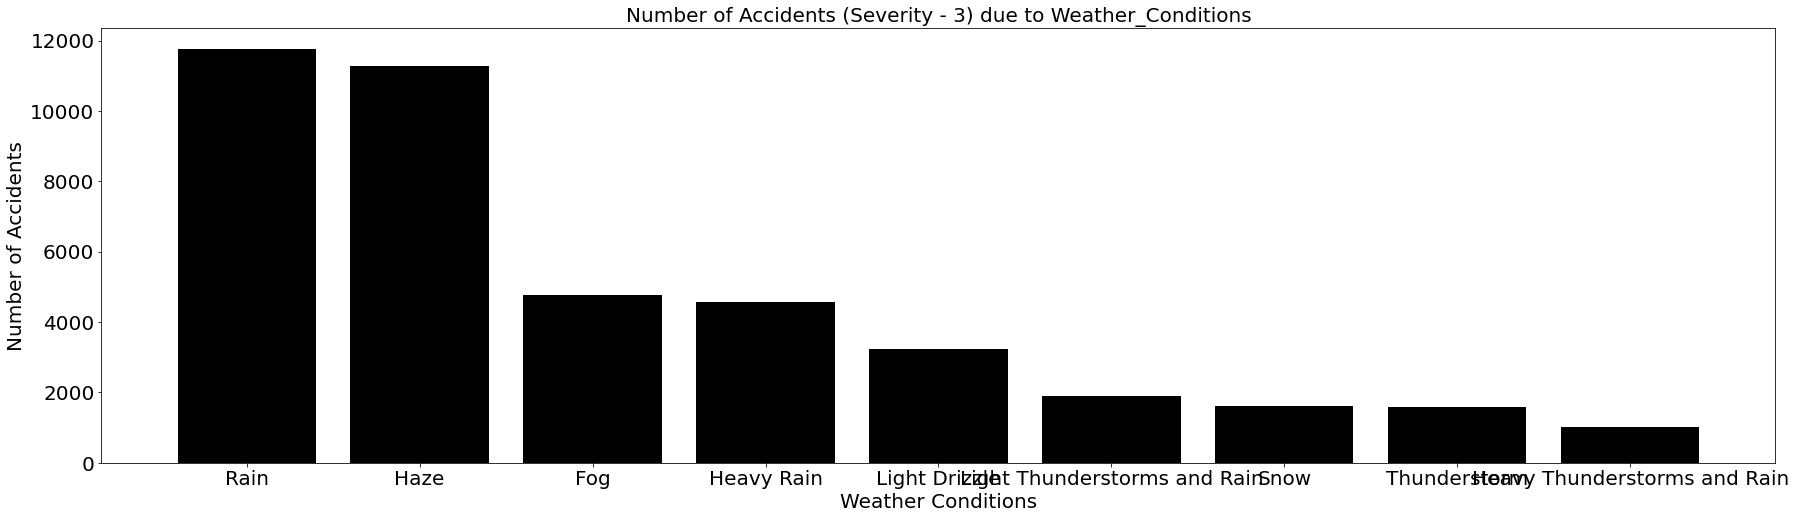

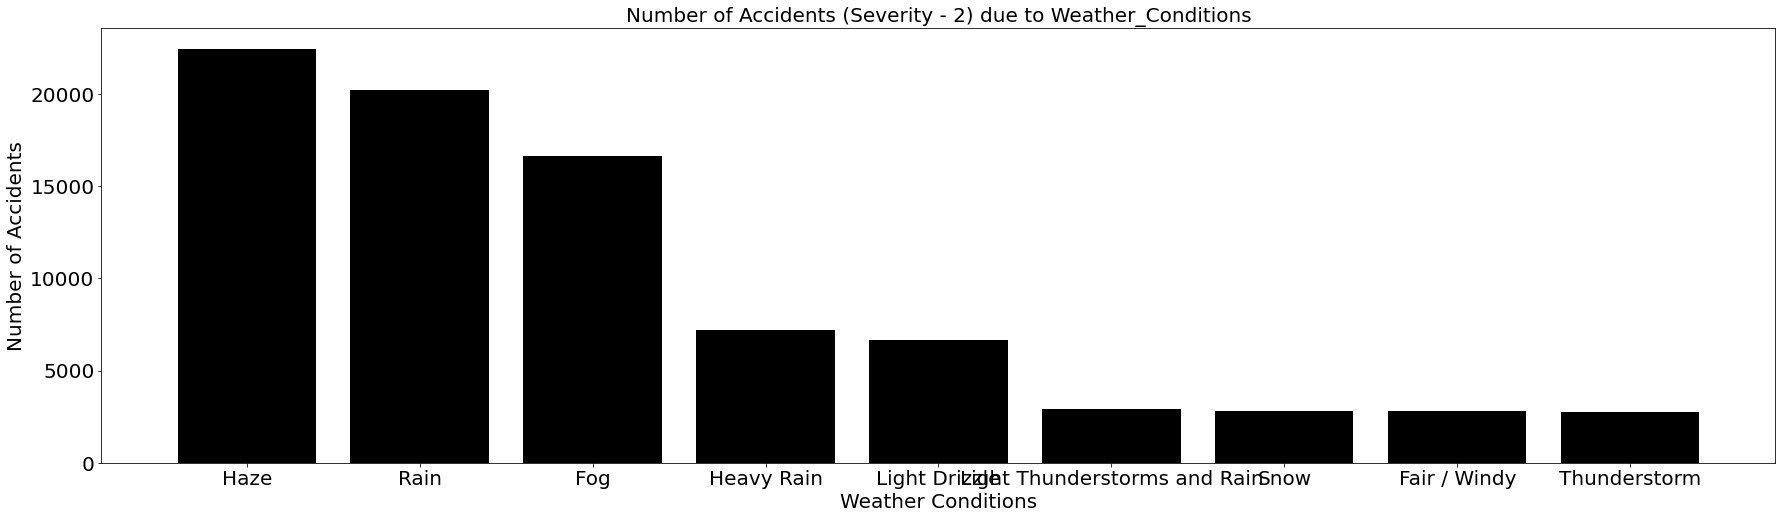

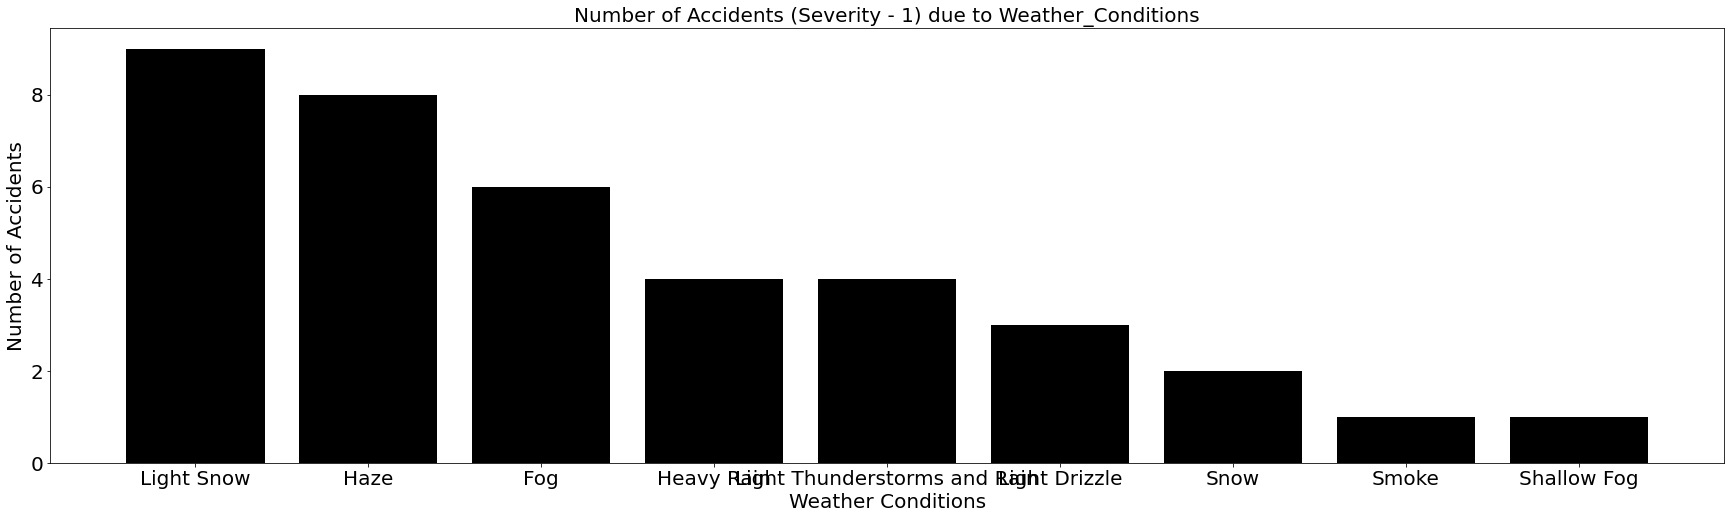

In [0]:
# Severity with Weather Conditions that are not common:

swma = acci.query('Severity == "4"')['Weather_Condition'].value_counts().reset_index()[9:18]
plt.figure(figsize=(30, 8))
plt.title('Number of Accidents (Severity - 4) due to Weather_Conditions',fontsize=20)
plt.bar(swma['index'], swma['Weather_Condition'], color='black')
plt.xlabel('Weather Conditions',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

swm1 = acci.query('Severity == "3"')['Weather_Condition'].value_counts().reset_index()[9:18]
plt.figure(figsize=(30, 8))
plt.title('Number of Accidents (Severity - 3) due to Weather_Conditions',fontsize=20)
plt.bar(swm1['index'], swm1['Weather_Condition'], color='black')
plt.xlabel('Weather Conditions',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

swm2 = acci.query('Severity == "2"')['Weather_Condition'].value_counts().reset_index()[9:18]
plt.figure(figsize=(30, 8))
plt.title('Number of Accidents (Severity - 2) due to Weather_Conditions',fontsize=20)
plt.bar(swm2['index'], swm2['Weather_Condition'], color='black')
plt.xlabel('Weather Conditions',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

swm3 = acci.query('Severity == "1"')['Weather_Condition'].value_counts().reset_index()[9:18]
plt.figure(figsize=(30, 8))
plt.title('Number of Accidents (Severity - 1) due to Weather_Conditions',fontsize=20)
plt.bar(swm3['index'], swm3['Weather_Condition'], color='black')
plt.xlabel('Weather Conditions',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

Network Mapping

In [0]:
# print((len(acci) - acci.count())*100/len(acci))
variables = pd.DataFrame((len(acci) - acci.count())*100/len(acci)>10)
removing_var = variables[variables[0] == True].index.values
removing_var = [i for i in removing_var]
acci = acci.drop(columns={i for i in removing_var})
acci = acci.drop(columns={'ID','Source','Zipcode'})
# ndd = newdata.to_dict()
acci.columns
acci.dropna().head()
acci['year'] = pd.to_datetime(acci['Start_Time']).dt.year
acci['month'] = pd.to_datetime(acci['Start_Time']).dt.month
acci['day'] = pd.to_datetime(acci['Start_Time']).dt.day
acci.shape

(2974335, 46)

{'CA': Text(-0.4286390542984009, -0.1556854546070099, 'CA'),
 'FL': Text(0.08099231123924255, -0.3830294907093048, 'FL'),
 'NC': Text(0.1831825226545334, 0.2664996087551117, 'NC'),
 'NY': Text(0.33941322565078735, 0.15572743117809296, 'NY'),
 'PA': Text(0.2685258984565735, -0.017175961285829544, 'PA'),
 'SC': Text(0.30256718397140503, -0.2047460675239563, 'SC'),
 'TX': Text(-0.19866639375686646, 0.38331612944602966, 'TX')}

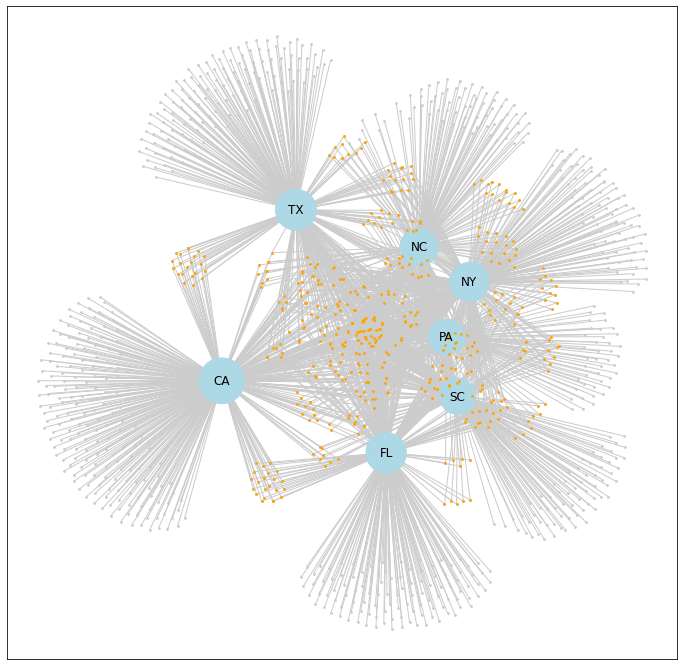

In [0]:

newdata1 = acci.query("State==['CA','TX','FL','SC','NC','NY','PA']")[['State','month','Severity','Weather_Condition','year']]
newdata1 = newdata1.groupby(['State','year','month','Weather_Condition']).count().reset_index()[['State','month','Severity']]
import networkx as nx

## initialize our network
# G=nx.from_pandas_edgelist(newdata1,'State','year',['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction'])
# nx.from_pandas_edgelist()
G=nx.from_pandas_edgelist(newdata1,'State','Severity')


state = newdata1['State'].unique()
wc = newdata1['Severity'].unique()

# dict(zip(state,state))
plt.figure(figsize=(12, 12))
layout = nx.spring_layout(G,iterations=50)
state1 = [G.degree(i)*5 for i in state]
## add nodes
# G.add_nodes_from(newdata['County'].unique())
# G.add_nodes_from(newdata['Humidity(%)'].unique())

nx.draw_networkx_nodes(G, 
                       layout, 
                       nodelist=state, 
                       node_size=state1, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(G, layout, nodelist=wc, node_color='#cccccc', node_size=3)
                  
#'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition'])
popular_people = [person for person in wc if G.degree(person) > 1]
nx.draw_networkx_nodes(G, layout, nodelist=popular_people, node_color='orange', node_size=3)

nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(state, state))
nx.draw_networkx_labels(G, layout, labels=node_labels)
# edge_lables1 = dict(zip(wc, wc))
# nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_lables1)

{'CA': Text(-0.1508261954909394, -0.4115935151516842, 'CA'),
 'FL': Text(0.03329925290909081, -0.5756470440192766, 'FL'),
 'NC': Text(0.003943921928377494, 0.450569368585403, 'NC'),
 'NY': Text(0.36150247828473386, -0.30779681022280847, 'NY'),
 'PA': Text(0.04972938286991238, 0.03822842648264231, 'PA'),
 'SC': Text(-0.6099292225327295, 0.686890113587882, 'SC'),
 'TX': Text(0.37300260404537094, 0.2379301645556022, 'TX')}

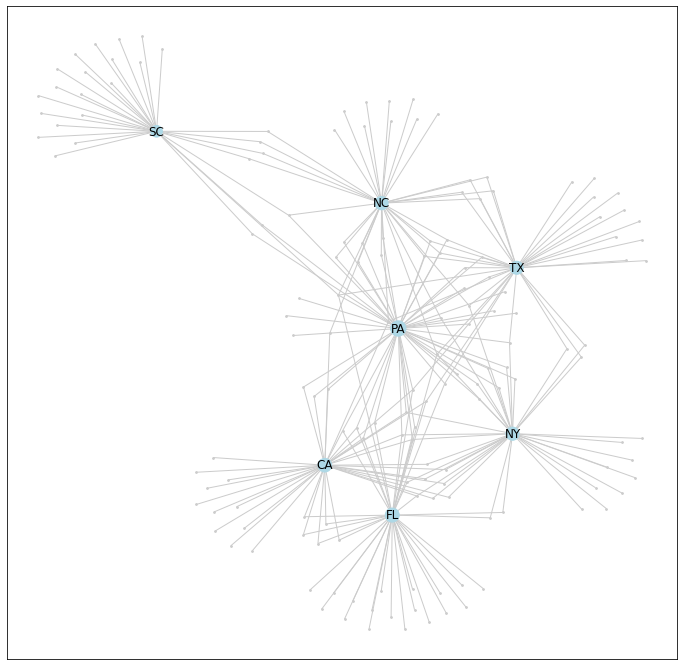

In [0]:

newdata1 = acci.query("State==['CA','TX','FL','SC','NC','NY','PA']")[['State','month','Severity','Weather_Condition','year']]
newdata1 = newdata1.query("Severity==[4]")[['State','month','Severity','Weather_Condition','year']]
newdata1 = newdata1.groupby(['State','year','month']).count().reset_index()[['State','month','Severity','Weather_Condition']]
import networkx as nx

## initialize our network
# G=nx.from_pandas_edgelist(newdata1,'State','year',['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction'])
# nx.from_pandas_edgelist()
G=nx.from_pandas_edgelist(newdata1,'State','Severity')


state = newdata1['State'].unique()
wc = newdata1['Severity'].unique()

# dict(zip(state,state))
plt.figure(figsize=(12, 12))
layout = nx.spring_layout(G,iterations=50)
state1 = [G.degree(i)*5 for i in state]
## add nodes
# G.add_nodes_from(newdata['County'].unique())
# G.add_nodes_from(newdata['Humidity(%)'].unique())

nx.draw_networkx_nodes(G, 
                       layout, 
                       nodelist=state, 
                       node_size=state1, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(G, layout, nodelist=wc, node_color='#cccccc', node_size=3)
                  
#'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition'])
popular_people = [person for person in wc if G.degree(person) > 1000]
nx.draw_networkx_nodes(G, layout, nodelist=popular_people, node_color='orange', node_size=3)

nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(state, state))
nx.draw_networkx_labels(G, layout, labels=node_labels)
# edge_lables1 = dict(zip(wc, wc))
# nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_lables1)



{1: Text(0.13694465205462725, -0.09056416593940977, '1'),
 2: Text(-0.24084759713104908, 0.11460499664004241, '2'),
 3: Text(0.1636969071045889, 0.12391431534792194, '3'),
 4: Text(-0.3528483183467378, -0.06575056948171178, '4'),
 5: Text(0.39812301334769484, 0.39980975892547505, '5'),
 6: Text(0.5524324584536923, -0.3108865453335949, '6'),
 7: Text(-0.12873058525972328, -0.4224797645382031, '7'),
 8: Text(0.13913802773930392, -0.36319943023995527, '8'),
 9: Text(0.43772298682293703, -0.013688267615891193, '9'),
 10: Text(-0.1393760402413574, 0.4962276620668337, '10'),
 11: Text(-0.4084931856027305, -0.3819763667993113, '11'),
 12: Text(-0.41846696989811205, 0.49807248435134677, '12')}

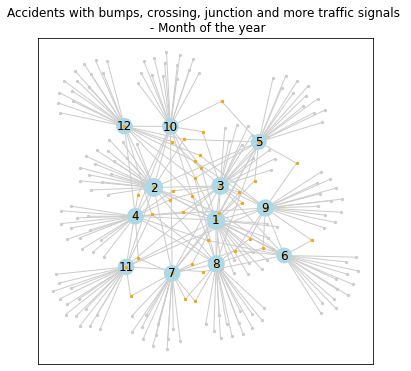

In [0]:

newdata1 = acci.query("State==['CA','TX','FL','SC','NC','NY','PA']")[['State','month','Severity','Weather_Condition','year','Traffic_Signal']]
# newdata1 = newdata1.query("year==2016")
newdata1 = newdata1.query("Traffic_Signal==True")
newdata1 = newdata1.groupby(['State','month','Severity']).count().reset_index()[['State','month','Severity','Weather_Condition','Traffic_Signal']]
import networkx as nx

## initialize our network
# G=nx.from_pandas_edgelist(newdata1,'State','year',['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction'])
# nx.from_pandas_edgelist()
G=nx.from_pandas_edgelist(newdata1,'month','Traffic_Signal')


state = newdata1['month'].unique()
wc = newdata1['Traffic_Signal'].unique()

# dict(zip(state,state))
plt.figure(figsize=(6,6))
plt.title('Accidents with bumps, crossing, junction and more traffic signals \n - Month of the year')
layout = nx.spring_layout(G,iterations=50)
state1 = [G.degree(i)*10 for i in state]
## add nodes
# G.add_nodes_from(newdata['County'].unique())
# G.add_nodes_from(newdata['Humidity(%)'].unique())

nx.draw_networkx_nodes(G, 
                       layout, 
                       nodelist=state, 
                       node_size=state1, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(G, layout, nodelist=wc, node_color='#cccccc', node_size=5)
                  
#'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition'])
popular_people = [person for person in wc if G.degree(person) > 1]
nx.draw_networkx_nodes(G, layout, nodelist=popular_people, node_color='orange', node_size=5)

nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(state, state))
nx.draw_networkx_labels(G, layout, labels=node_labels)
# edge_lables1 = dict(zip(wc, wc))
# nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_lables1)

